In [117]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.max_colwidth', 50)

In [103]:
bert_embeds = pd.read_csv("/kaggle/input/recc-sys-vectorized/BERT_embeddings_of_blogs (1).csv")
gs_embeds = pd.read_csv("/kaggle/input/recc-sys-vectorized/vectorized paras.csv")
spacy_embeds=pd.read_csv("/kaggle/input/recc-sys-vectorized/spacy_op.csv")

In [104]:
columns_to_drop = ['Unnamed: 0', 'title', 'content', 'authorHandle', 'authorID', 'rating']
spacy_embeds.drop(columns=columns_to_drop, inplace=True)

In [105]:
merge_result = pd.merge(bert_embeds, gs_embeds, left_on='blog_id', right_on='id', how='inner')
merge_result = pd.merge(merge_result, spacy_embeds, on='id', how='inner')

In [106]:
merge_result.drop(columns=['blog_id'],inplace=True)
merge_result.drop(columns=['Unnamed: 0'],inplace=True)
# print(merge_result.columns)

In [107]:
def parse_array_string(s):
    array_str = s.strip('[]')
    array = np.array([float(x) for x in array_str.split()])
    return array

In [108]:
merge_result['gs_array'] = merge_result['para_vector'].apply(parse_array_string)
merge_result['spacy_array'] = merge_result['spacy'].apply(parse_array_string)
merge_result['bert_array'] = merge_result['bert embedding'].apply(parse_array_string)

In [109]:
# print(merge_result.head())

In [110]:
merge_result['content'] = merge_result['content'].fillna('')

merge_result = merge_result[~merge_result['content'].str.contains("tutorial is loading", case=False)]
merge_result.reset_index(drop=True, inplace=True)

In [111]:
embeddings = np.vstack(merge_result['gs_array']).astype(float)

pca = PCA(n_components=30)
pca_result = pca.fit_transform(embeddings)

merge_result['gs_pca'] = pca_result.tolist()

embeddings = np.vstack(merge_result['spacy_array']).astype(float)

pca = PCA(n_components=30)
pca_result = pca.fit_transform(embeddings)

merge_result['spacy_pca'] = pca_result.tolist()

embeddings = np.vstack(merge_result['bert_array']).astype(float)

pca = PCA(n_components=30)
pca_result = pca.fit_transform(embeddings)

merge_result['bert_pca'] = pca_result.tolist()

# print(merge_result.head())

In [ ]:
random_ids = np.random.choice(merge_result['id'], size=25, replace=False)

filtered_result = merge_result[merge_result['id'].isin(random_ids)]

In [118]:
filtered_result[['id', 'content', 'tags']]

,id,content,tags
1033,65619,"i have 2 arrays a[n],b[n].(think of them as co...","['array', 'algorithm complexity', 'comparison']"
4830,84887,Be happy be healthyâ™¥,[]
4900,89847,Trying to solvethisproblem. I got the last non...,[]
5095,91171,1389B - Array WalkI have recently started lear...,[]
8960,88238,Recently I was preparing some problems in Poly...,"['polygon', 'checker']"
9160,86685,"Hello and thanks, everyone. I'm new to c++ so ...",['#help me']
10150,119755,"Hi, this side Imsfg. I used both map/unordered...","['c++', 'hashmap', 'unordered_map']"
10442,114888,"As you can see, today's Div2 Rank1syf2008is ac...",['cheater']
12186,49057,BSUIR Open Archives (polygon contests packages...,"['bsuir', 'championship', 'open', 'gym']"
12506,47337,my code :20895807input : AABCDEFGHIJKLMNOPQRST...,[]


In [113]:
EMBEDS = ['gs_pca','spacy_pca','bert_pca']
labels = {}
cluster_centers = {}

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

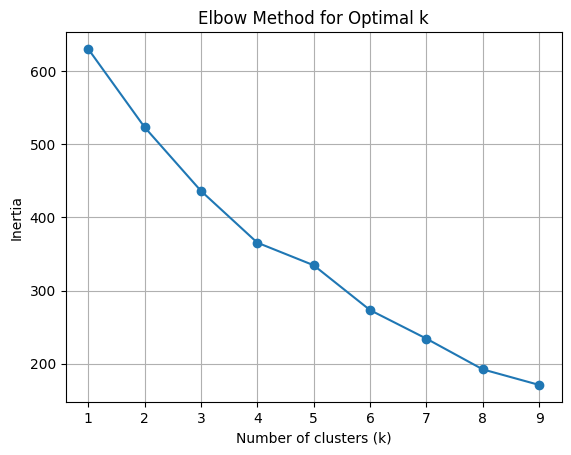

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

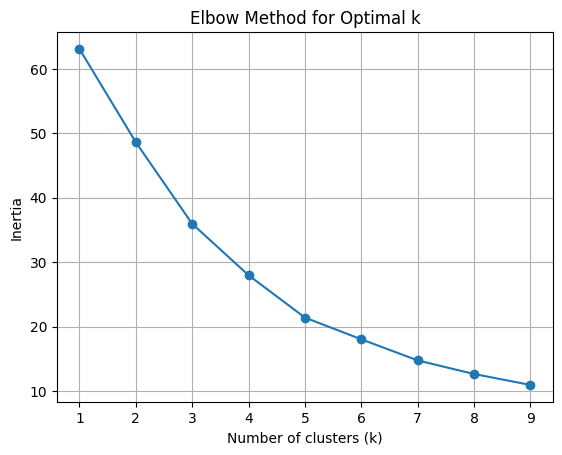

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

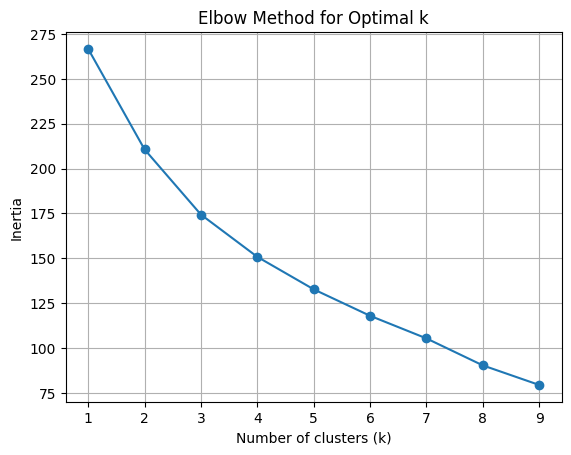

In [114]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

for item in EMBEDS:
    data = np.vstack(filtered_result[item]).astype(float)

    inertia_values = []

    k_values = range(1, 10)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)

        kmeans.fit(data)

        inertia_values.append(kmeans.inertia_)

    plt.plot(k_values, inertia_values, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

In [115]:
k = 5

for item in EMBEDS:

    data = np.vstack(filtered_result[item]).astype(float)

    kmeans = KMeans(n_clusters=k)

    kmeans.fit(data)
    labels[item] = kmeans.labels_
    cluster_centers[item] = kmeans.cluster_centers_
    unique, counts = np.unique(labels[item], return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    print("Cluster Counts:")
    print(cluster_counts)
    for i, label in enumerate(labels[item]):
        print(f"Element {i} belongs to cluster {label}")


Cluster Counts:
{0: 1, 1: 1, 2: 20, 3: 1, 4: 2}
Element 0 belongs to cluster 2
Element 1 belongs to cluster 2
Element 2 belongs to cluster 2
Element 3 belongs to cluster 2
Element 4 belongs to cluster 2
Element 5 belongs to cluster 2
Element 6 belongs to cluster 4
Element 7 belongs to cluster 2
Element 8 belongs to cluster 3
Element 9 belongs to cluster 2
Element 10 belongs to cluster 2
Element 11 belongs to cluster 2
Element 12 belongs to cluster 2
Element 13 belongs to cluster 2
Element 14 belongs to cluster 2
Element 15 belongs to cluster 1
Element 16 belongs to cluster 2
Element 17 belongs to cluster 2
Element 18 belongs to cluster 2
Element 19 belongs to cluster 2
Element 20 belongs to cluster 2
Element 21 belongs to cluster 2
Element 22 belongs to cluster 4
Element 23 belongs to cluster 0
Element 24 belongs to cluster 2
Cluster Counts:
{0: 15, 1: 1, 2: 1, 3: 7, 4: 1}
Element 0 belongs to cluster 3
Element 1 belongs to cluster 1
Element 2 belongs to cluster 3
Element 3 belongs to 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
dfs={}
for item in EMBEDS:
#     print(f"===================={item}=====================")
    closest_points_with_metadata = []

    for i, point in enumerate(merge_result[item]):
        max_similarity = -1
        closest_cluster = None

        for j, center in enumerate(cluster_centers[item]):
            similarity = cosine_similarity([point], [center])[0][0]

            if similarity > max_similarity:
                max_similarity = similarity
                closest_cluster = j

        closest_points_with_metadata.append((merge_result['id'][i], 
                                             merge_result['title'][i], 
                                             merge_result['content'][i], 
                                             merge_result['tags'][i], 
                                             point, 
                                             closest_cluster, 
                                             max_similarity*np.tanh(merge_result['rating'][i]/50)+1))

    closest_points_with_metadata.sort(key=lambda x: x[6], reverse=True)

    num_closest = 25

    dfs[item] = pd.DataFrame(closest_points_with_metadata[:25], columns=['ID', 'Title', 'Content', 'Tags', 'Point', 'Closest Cluster', 'Similarity'])

#     # Initialize counters for each cluster
#     cluster_counts = {}
#     for cluster_idx in range(k):  # Use cluster_idx here
#         cluster_counts[cluster_idx] = 0  # Use cluster_idx here as well

#     # Count the elements in each cluster
#     for _, _, _, _, _, cluster_idx, _ in closest_points_with_metadata:
#         cluster_counts[cluster_idx] += 1

#     # Print the counts for each cluster
#     for i in range(k):
#         print(f'Cluster {i} count: {cluster_counts[i]}')


In [125]:
dfs[EMBEDS[0]]

,ID,Title,Content,Tags,Point,Closest Cluster,Similarity
0,73212,Solving problems on first sight + streaming,TL;DR I am thinking of holding a series of liv...,"['livestream', 'videos', 'coaching']","[-2.6193121755473867, -1.3790123710790896, 3.7...",1,1.999813
1,49057,A little bit BSUIR Open into gym,BSUIR Open Archives (polygon contests packages...,"['bsuir', 'championship', 'open', 'gym']","[-1.4790922973966387, 1.1760136585521195, -1.9...",3,1.998623
2,81358,I'm ecnerwala. Ask Me Anything!,"Hi everyone!code_warriorrecently asked ""How is...","['ama', 'interview', 'social', 'ecnerwala']","[-1.2109257036676127, -1.3922421517603145, 2.1...",1,1.738015
3,20489,What's slower than a segment tree and needs so...,It'ssqrt decomposition. It didn't rime. Bummer...,[],"[5.318040170927215, 0.4252801709976638, 3.6447...",0,1.705204
4,46323,AtCoder Grand Contest 002,AtCoder Grand Contest 002will be held on Sunda...,"['atcoder', 'agc', 'agc002']","[-0.4557780972498998, 0.5157800955597956, -0.8...",3,1.690436
5,78815,(Maybe) A Bug Of Codeforces Interactive Proble...,"In this problem:1364E - X-OR,the discription s...",[],"[0.2923337398530138, -1.6323641414485264, 0.02...",4,1.668582
6,20276,I will be doing 24h livestream during Marathon...,Updated on 07/12 for the last timePostmortem--...,"['livestream', 'marathon24', 'psyhogonewild']","[-3.010387476689212, 0.3709521356919836, 3.811...",1,1.663143
7,7087,Codeforces Round #175 (Div. 2),"Good day, friends)Welcome to regular Codeforce...","['codeforces', 'round', '175']","[-0.35446753696755834, 1.1836930535402639, -0....",3,1.652974
8,61239,Blogewoosh #2,"Hello, codeforces!All signs in the sky and on ...",['blogewoosh'],"[5.526446065698168, 2.273668987526779, 2.13987...",0,1.652061
9,74017,Screencast collection,I will update this blog when I upload new scre...,['screencast'],"[-0.8996442776611158, 0.18249550113377527, -0....",3,1.646925


In [126]:
dfs[EMBEDS[1]]

,ID,Title,Content,Tags,Point,Closest Cluster,Similarity
0,49057,A little bit BSUIR Open into gym,BSUIR Open Archives (polygon contests packages...,"['bsuir', 'championship', 'open', 'gym']","[0.6721071451312359, 1.6719665755113329, -0.85...",2,1.998623
1,47060,Helping Contestants Help Us All or Competition...,During my competition history I've collected a...,['problemsetting'],"[-0.9754051311150096, -0.5132965739437328, 0.0...",0,1.933445
2,112856,"If I can do it, anyone can",I'm writing this blog as a brief account of my...,[],"[-0.9408107488894119, -0.4487585443743908, 0.0...",0,1.932874
3,98621,Self-deception: maybe why you're still grey af...,I generally don't like to give much advice on ...,[],"[-0.8238899417379001, -0.47182073317265444, 0....",0,1.930273
4,83895,My thoughts on clarifications and on the round...,"Alright, I'm done. I wanted to write a blog li...",[],"[-0.7155926381190538, -0.41588837692613895, 0....",0,1.923100
5,94765,Changes in CodeChef Problemsetting,Hello Codeforces!For the last half a year I ha...,['codechef'],"[-0.7683515448516817, -0.37817487944130584, 0....",0,1.921006
6,110245,Red Isn't Impossible,I waited for more than a year to write this bl...,[],"[-0.7225991509366844, -0.3836328887848367, 0.0...",0,1.913017
7,6928,Judges adding tests against submitted solution...,In the discussion athttp://codeforces.com/blog...,[],"[-0.775915036464599, -0.4463080483494599, -0.0...",0,1.912728
8,103077,"You can do it, too!","IntroductionSo, I set myselfthat challengeto r...",[],"[-0.7464074945562664, -0.328822340655177, 0.08...",0,1.911110
9,96313,False Positive in Codeforces' Anti-Cheat Detec...,"On the recent round 750 (div. 2), I originally...","['cheating', 'anti-cheat']","[-0.823031863329896, -0.4447989281660075, 0.03...",0,1.904396


In [127]:
dfs[EMBEDS[2]]

,ID,Title,Content,Tags,Point,Closest Cluster,Similarity
0,92492,Tutorial of Codeforces Round 729 (Div.2),A TutorialThe answer is 'yes' if and only if t...,[],"[4.120284394474206, 0.0968113407813389, 0.3387...",0,1.952143
1,85969,Nice trick involving sparse matrix exponentiat...,"Recently, Iâ€™ve figured out a way to improve ...","['#matrix exponentialtion', 'linear algebra']","[3.451157286679493, 0.0014149044731278115, -0....",0,1.947290
2,119772,Harbour.Space Scholarship Contest 2023-2024 (D...,Thank you for participation and we hope you en...,[],"[3.5566266487852833, 0.23905636595328167, 0.34...",0,1.935176
3,126662,Codeforces Round #932 (Div. 2) Editorial,1935A - Entertainment in MACIdea:i_love_pengui...,[],"[3.57616241852755, 0.19035951810119678, 0.4162...",0,1.934848
4,114899,Editorial of Codeforces Round #865,"Thanks for participating, and happy Easter!181...",[],"[3.532692445732853, -0.21416767057421285, 0.30...",0,1.932258
5,114521,"Editorial of CodeTON Round 4 (Div. 1 + Div. 2,...",A. Beautiful SequenceHintWhat is the necessary...,[],"[3.7447725591723557, 0.2020459462830614, 0.456...",0,1.931499
6,110184,Polynomial Round 2022 (Div. 1 + Div. 2) Editorial,Thanks for your participation! I am so sorry f...,[],"[3.301559031468864, 0.006522109560128632, 0.51...",0,1.931421
7,110754,Good Bye 2022 -- Editorial,1770A - Koxia and WhiteboardsIdea bym_99Hint 1...,[],"[3.400222586493249, 0.054232487858157236, 0.48...",0,1.930129
8,54090,[Tutorial] Math note â€” linear sieve,This short article is mainly focused on the li...,"['math', 'sieve', 'tutorial']","[3.458502923326845, -0.33887339029084673, 0.17...",0,1.928471
9,112723,Codeforces Round #852 Editorial,1793A - Yet Another Promotionwas authored and ...,[],"[3.680244571354585, 0.3963262650994896, 0.3332...",0,1.926639
